In [184]:
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import scipy
from sklearn.decomposition import PCA



def spline_accelerometer(feature_vec, kk = 4):
    """
    Given a 128 segment accelerometer feature vector separated
    as [a_x1, a_y1, a_z1, a_x2, ... , a_z128]

    we fit the data with a univariate spline
    """

    xline = feature_vec[0::3]
    yline = feature_vec[1::3]
    zline = feature_vec[2::3]


    #spline the accleration, aka alpha'
    num = len(feature_vec)/3
    t = np.arange(0,num) #define time interval
    a_x_spline = IUS(t, xline, k = kk)
    a_y_spline = IUS(t, yline, k = kk)
    a_z_spline = IUS(t, zline, k = kk)

    return a_x_spline, a_y_spline, a_z_spline


def calc_torsion(feature_vec):
    """
    given accelerometer feature vector (which we call alpha prime),
    calculate the torsion at each 0.02 second time interval

    by finding first and second derivatives of accelerometer data
    """
    #get alpha
    a_x_spline, a_y_spline, a_z_spline = spline_accelerometer(feature_vec)

    #find alpha'
    ap_x_spline = a_x_spline.derivative()
    ap_y_spline = a_y_spline.derivative()
    ap_z_spline = a_z_spline.derivative()

    #find alpha''
    app_x_spline = ap_x_spline.derivative()
    app_y_spline = ap_y_spline.derivative()
    app_z_spline = ap_z_spline.derivative()
    
    #find alpha'''
    appp_x_spline = app_x_spline.derivative()
    appp_y_spline = app_y_spline.derivative()
    appp_z_spline = app_z_spline.derivative()

    #define time interval
    num = len(feature_vec)/3
    t = np.arange(0,num) #define time interval

    #calculate torsion
    torL = []
    for tt in t:
        #calculate vector
        v_1 = np.array([ap_x_spline(tt), ap_y_spline(tt), ap_z_spline(tt)])
        v_2 = np.array([app_x_spline(tt), app_y_spline(tt), app_z_spline(tt)])
        v_3 = np.array([appp_x_spline(tt), appp_y_spline(tt), appp_z_spline(tt)])

        #calculate the torsion and shove it in list
        torsion = 3 * np.linalg.det([v_1, v_2, v_3])  \
                   /np.linalg.norm(np.cross(v_1, v_2))**2
        torL += [torsion]
    return torL



def calc_curvature(feature_vec):
    """
    given accelerometer feature vector (which we call alpha prime),
    calculate the curvature at each 0.02 second time interval

    by finding first and second derivatives of accelerometer data
    """
    #get alpha
    a_x_spline, a_y_spline, a_z_spline = spline_accelerometer(feature_vec)

    #find alpha'
    ap_x_spline = a_x_spline.derivative()
    ap_y_spline = a_y_spline.derivative()
    ap_z_spline = a_z_spline.derivative()

    #find alpha''
    app_x_spline = ap_x_spline.derivative()
    app_y_spline = ap_y_spline.derivative()
    app_z_spline = ap_z_spline.derivative()
    
    #find alpha'''
    appp_x_spline = app_x_spline.derivative()
    appp_y_spline = app_y_spline.derivative()
    appp_z_spline = app_z_spline.derivative()

    #define time interval
    num = len(feature_vec)/3
    t = np.arange(0,num) #define time interval
    #calculate curvature
    curvL = []
    for tt in t:
        #calculate vector
        v_1 = np.array([ap_x_spline(tt), ap_y_spline(tt), ap_z_spline(tt)])
        v_2 = np.array([app_x_spline(tt), app_y_spline(tt), app_z_spline(tt)])

        #calculate curvature
        curvature = 2 * np.linalg.norm(np.cross(v_1, v_2)) \
                    /np.linalg.norm(v_1)**(3/2)
        curvL += [curvature]

    return curvL

In [198]:
t = np.linspace(0, 100, 10000)
hel = np.array([1 * np.cos(t), 4* np.sin(t), t])

In [199]:
test = hel.T.flatten()
test

array([  1.        ,   0.        ,   0.        , ...,   0.86231887,
        -2.02546256, 100.        ])

In [200]:
import matplotlib.pyplot as plt

In [201]:
from mpl_toolkits.mplot3d import Axes3D

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.

SyntaxError: invalid syntax (<ipython-input-202-4a75d5fa47dd>, line 4)

In [203]:
from scipy.fft import fft, ifft

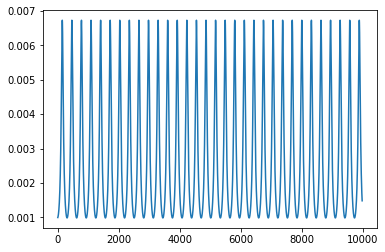

In [204]:
plt.plot(calc_curvature(test)[10:-10])

In [205]:
calc_curvature(test)[100]

0.0026196105958609444